In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline
print('Libraries loaded successfully!')

Libraries loaded successfully!


In [19]:
# GPU MEMORY
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")

if len(gpu_device) > 0:
    tf.config.experimental.set_memory_growth(gpu_device[0], True)
    print('GPU memory growth enabled')

Number of GPU = 0


In [20]:
#DATASET LOADING
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


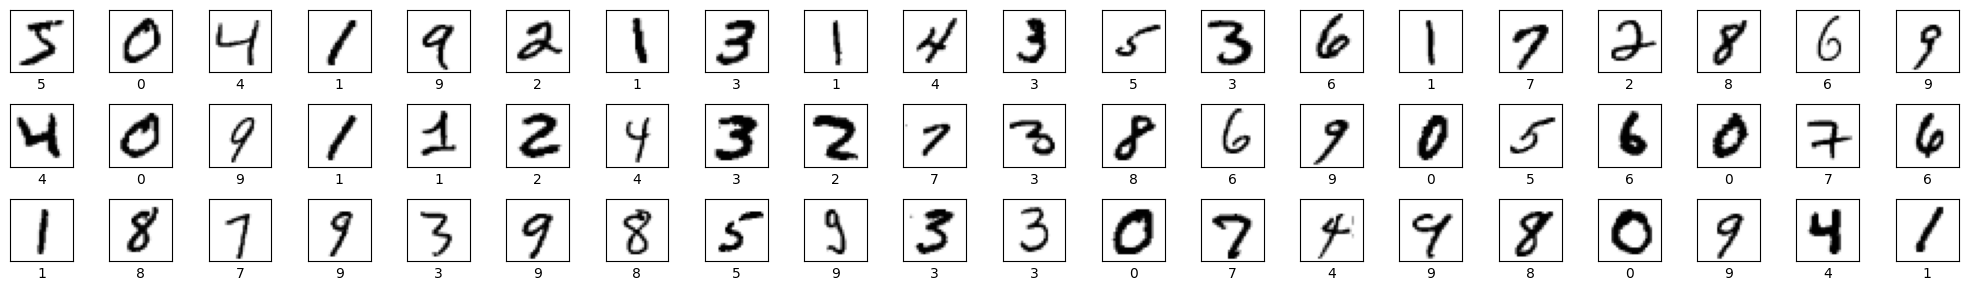

In [21]:
#SAMPLE VISUALIZATION
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [22]:
# DATA NORMALIZATION
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
print('Data normalized: pixel values scaled to [0, 1]')

Data normalized: pixel values scaled to [0, 1]


In [23]:
# MODEL ARCHITECTURE
model = keras.Sequential([
    keras.Input(shape=(28 * 28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# COMPILE MODEL
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print('Model compiled with Adam optimizer')

Model compiled with Adam optimizer


In [25]:
#TRAINING
h = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9195 - loss: 0.2709 - val_accuracy: 0.9566 - val_loss: 0.1476
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9694 - loss: 0.1016 - val_accuracy: 0.9691 - val_loss: 0.1037
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9791 - loss: 0.0662 - val_accuracy: 0.9722 - val_loss: 0.0983
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9849 - loss: 0.0478 - val_accuracy: 0.9708 - val_loss: 0.1046
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9886 - loss: 0.0359 - val_accuracy: 0.9739 - val_loss: 0.0971
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9737 - val_loss: 0.1006
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9728 - val_loss: 0.1031
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.

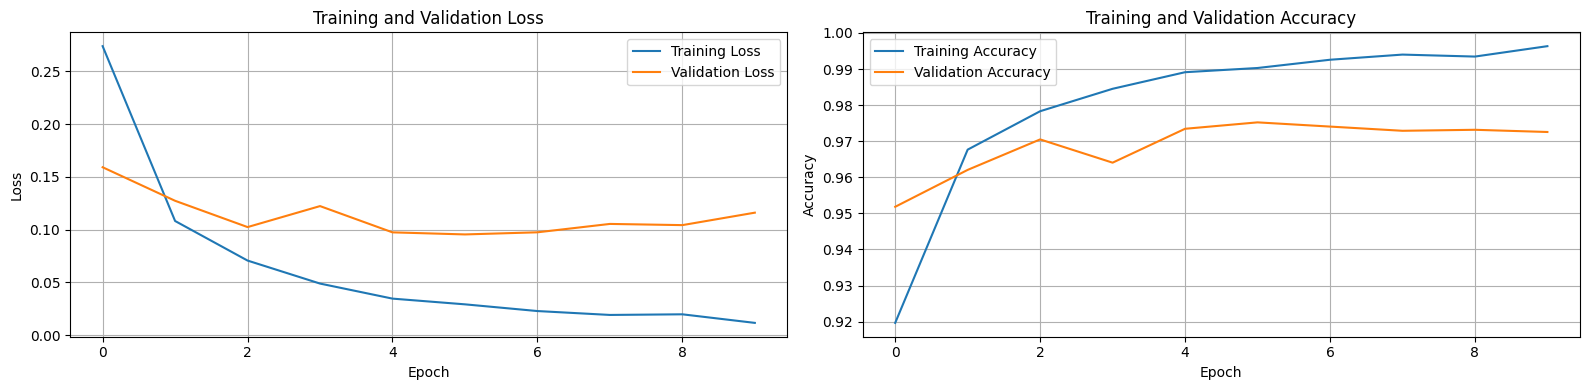

In [10]:
# TRAINING VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot loss
axes[0].plot(h.history['loss'], label='Training Loss')
axes[0].plot(h.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

# Plot accuracy
axes[1].plot(h.history['accuracy'], label='Training Accuracy')
axes[1].plot(h.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [11]:
# MODEL EVALUATION
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9764 - loss: 0.1005


[0.10049331933259964, 0.9764000177383423]

## Webcam based detection

| Feature | Implementation |
|---------|----------------|
| Threshold | Otsu's automatic |
| Preprocessing | Morphological operations |
| Box Position | Bottom-right corner |
| Box Style | Cyan dashed-look |

In [ ]:
#HELPER FUNCTIONS

import cv2
import numpy as np

def grayscale(img):
    # Convert color image to black and white
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def blur(img, size=7):
    # Smooth image to remove noise
    return cv2.GaussianBlur(img, (size, size), 0)

def threshold(img):
    # Convert to pure black and white
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary

def clean_image(img):
    # Create small shapes for cleaning
    small = np.ones((3, 3), np.uint8)
    big = np.ones((5, 5), np.uint8)
    
    # Remove small dots
    clean = cv2.morphologyEx(img, cv2.MORPH_OPEN, small, iterations=1)
    # Fill small holes
    clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, big, iterations=1)
    
    return clean

def find_digit(img, min_area=800):
    Find the biggest white shape (the digit)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    # Find biggest shape
    biggest = max(contours, key=cv2.contourArea)
    
    # Check if big enough
    if cv2.contourArea(biggest) < min_area:
        return None
    
    return biggest

def prepare_digit(img, contour):
    # Cut out the digit
    x, y, w, h = cv2.boundingRect(contour)
    digit = img[y:y+h, x:x+w]
    
    # Make it square
    size = max(w, h)
    square = np.zeros((size, size), dtype=np.uint8)
    
    # Center the digit
    x_off = (size - w) // 2
    y_off = (size - h) // 2
    square[y_off:y_off+h, x_off:x_off+w] = digit
    
    # Add border around it
    with_border = cv2.copyMakeBorder(square, 15, 15, 15, 15, cv2.BORDER_CONSTANT, value=0)
    
    # Resize to 28x28
    final = cv2.resize(with_border, (28, 28), interpolation=cv2.INTER_AREA)
    
    return final

def predict_digit(img, model):
    """Use model to predict what digit it is"""
    # Normalize to 0-1 like training
    img_normal = img.astype('float32') / 255.0
    
    # Flatten and predict
    img_flat = img_normal.reshape(1, 784)
    prediction = model.predict(img_flat, verbose=0)
    
    # Get best guess and confidence
    digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    return digit, confidence

def draw_box(img, x, y, size, color, thickness=2):
    #Draw box 
    end_x = x + size
    end_y = y + size
    corner = 20
    
    # Define 4 corners: top-left, top-right, bottom-left, bottom-right
    corners = [
        ((x, y), (x + corner, y), (x, y), (x, y + corner)),  # Top-left
        ((end_x, y), (end_x - corner, y), (end_x, y), (end_x, y + corner)),  # Top-right
        ((x, end_y), (x + corner, end_y), (x, end_y), (x, end_y - corner)),  # Bottom-left
        ((end_x, end_y), (end_x - corner, end_y), (end_x, end_y), (end_x, end_y - corner))  # Bottom-right
    ]
    
    # Draw all corner lines
    for corner_lines in corners:
        start1, end1, start2, end2 = corner_lines
        cv2.line(img, start1, end1, color, thickness)
        cv2.line(img, start2, end2, color, thickness)

print('All functions ready!')

All functions ready!


In [ ]:
# WEBCAM DIGIT RECOGNITION MAIN LOOP
import random

# Start webcam
cap = cv2.VideoCapture(0)

# Drawing box position
x, y, w, h = 300, 200, 200, 200

while True:
    # Get frame from webcam
    ret, frame = cap.read()
    if not ret:
        break
    
    # Flip to make it mirror-like
    frame = cv2.flip(frame, 1)
    
    # Get the drawing area (box)
    roi = frame[y:y+h, x:x+w]
    
    # Convert to black and white
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    _, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Prepare for model
    img = cv2.resize(binary, (28, 28)).reshape(1, 784).astype('float32') / 255.0
    
    # Predict digit
    prediction = model.predict(img, verbose=0)
    digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # Draw green box
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Show prediction
    cv2.putText(frame, f"Digit: {digit}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Confidence: {confidence:.0f}%", (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(frame, "Press Q to quit", (10, 450), 
                cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 255), 2)
    
    # Show windows
    cv2.imshow('Draw Digit', frame)
    cv2.imshow('Model View', binary)
    
    # Press Q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Stop webcam and close windows
cap.release()
cv2.destroyAllWindows()

In [16]:
# Clean up everything
cap.release()
cv2.destroyAllWindows()
print("Webcam closed")

Webcam closed
